## These are examples of how to use hypothesis tests, with correspondent probability distributions and descriptive variable measures, in order to reject/confirm H0 and confirm/reject H1 hypothesis, including monovariated mean tests on Z and T distributions, multivariated correlation tests on T distributions, mono and bivariated chi-square tests on chi-square distributions, bivariated variance tests on F distributions, monovariated mean confidence interval on Z and T distributions and bivariated mean tests on T distributions, using as tools Python, Pandas, NumPy and Matplotlib

* the formulas shown at this notebook have been taken from the following reference:<br>
FÁVERO, L. P.; BELFIORE, P. **Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®**. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.<br>
Available in Brazil at:<br>
https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

In [1]:
# importing libs and setting default plot style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
import math

### Introduction concepts regarding hypothesis tests

Before reading this section, you should first review the following previous sections, as this one is supposed to be a continuation for them:
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/frequency-table.ipynb
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/position-dispersion-shape.ipynb
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/chi-square.ipynb
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/covariance-pearson-correlation-coefficient.ipynb
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/prob-distributions-discrete.ipynb
- https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/prob-distributions-continuous.ipynb


In [2]:
# Knowing how to calculate sample descriptive statistics and generate probability distributions isn't enough if we don't know how to test
# the confidence and significance of the extrapolations of those sample statistics to the whole population of interest... after all, that's
# generally our main problem. So, in order that our sample statistics have any use, regarding the whole population of interest, we gotta
# analyse how significant and how much error there could be in such extrapolations, that is, we gotta calculate additional hypothesis (H0/H1)
# test statistics regarding confidence of the descriptive statistics, when these are calculated on the samples and later extrapolated to the 
# respective general population. So here we combine descriptive statistics, probability distributions and hypothesis tests, in order to 
# be able to generalize sample statistics to population statistics, with the respective and possible error associated quantified. H0 is the 
# null hypothesis, which, when favored by our hypothesis tests, means no effect, no association, no correspondence or any non-existing 
# relationship between, for instance, sample values and population historical values of a single variable; or observed and predicted values; 
# or between the measured statistics of two independent variables, etc. H1 hypothesis, on the other hand, confirmed when H0 is rejected, 
# means there is a significant statistical difference between single variable different data sets or multiple variables' data sets, with a 
# positive or negative effect, instead of the no-effect of H0. For each hypothtesis test we'll have specific probability distributions on 
# which we'll be able to analyse our statistics, both descriptive as the hypothesis test stastistics, with certain confidence and 
# significance levels, as well as with certain degrees of freedom. So, on the examples below we test H0 and H1 hypothesis, calculating the 
# test statistics and using the appropriate probability distributions in order to give the user the information about how trustful our 
# descriptive statistics are when extrapolated to the population of interest, that is, when population statisctic measures are inferred from
# our sample calculated and analysed statistics. In a simpler way, how valid our sample statistics are when applied to the real world.

# So, regarding specifically the analysis of our calculated hypothesis statistics on our probability distribution graphs, the test can be
# a two-tailed test or a one-tailed test (on the left or on the right tail). That means that, after we calculate our hypothesis test 
# main statistic, we're gonna compare it with both-tail or single-tail regions of our probability distribution. The statistics we're gonna
# compare our main test statistic with are the significance level (alfa - generally 5% or 1% or 10%), the critical value for that alfa
# (the x-axis value that defines that alfa area to the right or to the left of the tail) and the p-value, which is the area, to the right
# or to the left tails, defined by our main statistic value on the x-axis. If the test is a two-tailed test, the alfa and the p-value areas 
# are distributed - half to the left tail, half to the right tail. If the test is a single-tail one, the alfa and the p-value are unique
# areas either at the left single tail or at the right single tail of our distribution. The main statistic and the critical value can be
# calculated for either tail, if a two-tailed test is used, and, if the distribution is symmetric, only the sign will change. For each
# case of distribution, a correct analysis should be performed, depending on which tail (left or right) we're analysing the significance and 
# confidence of our main statistic at. For ex., if analysed at the right tail of the distribution, we'll reject H0 and confirm H1 if we have
# a main statistic >= critical value, which is the same of having a p-value area <= alfa. If analysed at the left tail, it's the other way
# around: we reject H0 and confirm H1 if we have a main statistic <= critical value, which is the same of having a p-value area <= alfa. If,
# in any case, our p-value area is greater than the alfa, H0 is not rejected and H1 can't be affirmed. Varying the alfa (significance), or 
# the degrees of freedom, the hypothesis results also vary. If the problem tolerates a more flexible significance, e.g. alfa = 10%, compared 
# to if alfa = 0.1%, then we have much more space to probabilistically fit our main statistic (and its p-value area) within that critical 
# distribution space, that is, within the alfa significant area... thus rejecting H0 and confirming H1. The significance level will depend 
# on the type of problem, and how much confidence and significance we would need on our sample statistics when used to infer real-world 
# statistics (within a calculated interval of confidence). Confidence level is 1 minus the significance level: if significance level is 5%,
# confidence level is 95%. Significance level means our chance of mistakenly affirming H1 and rejecting H0, when H0 should not be rejected 
# and H1 should not be affirmed. Confidence level means how much certain we are that our test, repeated many times, would have the same
# results (for a calculated confidence interval) - i.e., how precise our test is. And the confidence interval, which is different from
# confidence level (though related), means the range of values accepted for our main statistic so that we would still have the same 
# hypothesis result if our statistic falls within that confidence interval. Any main statistic value that falls within the calculated 
# confidence interval will lead, after analysis on the probability distribution, to the same conclusions regarding the hypothesis test - 
# both regarding H0 and H1, and our conclusions will be the same.

# Below it is shown some of the existing hypothesis test types, along with the calculation of the main statistic for each test and the 
# analysis of such statistic on the respective probability distribution, considered the statistic itself, its calculated p-value, the alfa 
# (significance level), its calculated critical value and the degrees of freedom (to be considered at the calculation of the main 
# statistic, and other test statistics). For each example, we confirm or reject H0, thus rejecting or confirming H1.

### Monovariated mean test on a Z probability distribution (Z-test of a single variable mean)

![z-test-means-monovariated](z-test-means-monovariated.png)

In [3]:
# This type of hypothesis test, on a Z probability distribution, is used when we have available the population standard deviation and the
# distribution of values on the sample mean is normal (usually when we have very big samples). Generally we want to test if the sample mean
# is greater or lower, or simply different, from the population mean, considered this one single variable (mean). The main statistic 
# calculated is Z, from which we calculate the p-value area. From the given significance level (alfa), we calculate the critical value of
# Z and compare that to the main statistic Z value... or compare the p-value with the alfa itself, as explained above. If the hypothesis H1
# is regarding simply the difference between sample and population mean variables, it is a classical two-tailed distribution, including both
# the right tail (above critical value Z), where the sample Z values would be significantly higher than the population Z values, as also the
# left tail (below critical value -Z), where the sample Z values would be significantly lower the population Z values... therefore different,
# in both such cases. If the hypothesis H1 regards not simply the difference, but the superiority of the Z sample values compared to the 
# Z population values, we'd have a one-tailed distribution, with the analysis only at the right tail: if the calculated main statistic is
# greater than the Z critical value, or the p-value area is smaller than the alfa (on the right tail!), the sample Z values are greater (H0 
# rejected and H1 confirmed). Finally, if the hypothesis H1 regards not simply the difference, but the inferiority of the Z sample values 
# compared to the Z population values, we'd also have a one-tailed distribution, but with the analysis on the left tail only: if the 
# calculated main statistic is smaller than the -Z critical value, or the p-value area is smaller than the alfa (on the left tail!), the 
# sample Z values are smaller (H0 rejected and H1 confirmed). If the calculated sample Z value falls into the central area of the 
# distribution that is not the critical area (main statistic Z lower than the critical Z on the right tail or main statistic Z higher than 
# the critical -Z on the left tail - or the p-value is smaller than the alfa in any case) then H0 would not be rejected and H1 would not
# be confirmed, i.e., there would be no significant difference between sample and population mean values, or the sample mean values would
# not be significantly greater than the population mean values, or the the sample mean values would not be significantly lower than the
# population mean values... respectively. In all these last three cases, the sample and population means would be statistically equal 
# (though mathematically different). Similar reasoning applies to all other hypothesis test types below.

In [4]:
# Case: in a production line, we wanna check if the raw material mass used to manufacture the end product has increased or not (values 
# below), compared to historical know values. Historically, the mean usage of raw material for each final product is 100g, with a standard 
# deviation of 12g. Calculate and analyse if, in a random sample, the mean usage of raw material for each final product is in accordance 
# or has increased, compared to that historical pattern, having 5% as the significance level.

H0 = "Both sample and population (historical) means are statistically equal."
H1 = "Sample current mean is greater than population (historical) mean, therefore, raw material mass per final product has increased and production line is thus less efficient than it was before."

raw_prod_mass_in_grams_sample = [102,107,100,101,106,100,105,106,99,108,110,109,101,104,105,97,101,100,99,106,107,102,108,100,109,114,106,
                                 99,102,107,115,103,107,110,100,102,103,100,99,104]

# Comments: historical descriptive statistics (in this case, the mean and sd of raw material mass per final product) can be considered as 
# the population statistics. The sample values can be used to calculate the correspondent sample statistics (mean and sd). Those are the 
# descriptive statistics we'll be using to calculate the hypothesis test statistic Z, in order to analyse the Z (main test statistic) on 
# the Z probability distribution. This main statistic Z will have the p-value area calculated from it, and both will be compared to the 
# alfa and the Z critical value (calculated from the alfa). As the H1 hypothesis relates to a greater mean of our sample values compared
# to the population values' mean, we should analyse the test statistics on the right tail of this two-tailed Z distribution.

# calculating mean and n of our sample values
raw_prod_mass_in_grams_sample_mean = np.mean(raw_prod_mass_in_grams_sample)
raw_prod_mass_in_grams_sample_n = np.count_nonzero(raw_prod_mass_in_grams_sample)

# mean and sd of population values are given, as well as alfa:
raw_prod_mass_in_grams_population_mean = 100
raw_prod_mass_in_grams_population_sd = 12
raw_prod_mass_in_grams_z_test_alfa = 0.05

# calculating Z main test statistic (from both our sample and population descriptive statistics):
raw_prod_mass_in_grams_z_test_statistic = (raw_prod_mass_in_grams_sample_mean-raw_prod_mass_in_grams_population_mean)/(raw_prod_mass_in_grams_population_sd/np.sqrt(raw_prod_mass_in_grams_sample_n))

# here we wanna check if the sample values mean is significantly greater than the population values mean, therefore we should do the analysis
# on the right tail of the Z distribution
# calculating p-value area from Z at the right tail:
raw_prod_mass_in_grams_z_test_p_value = 1-stats.norm.cdf(raw_prod_mass_in_grams_z_test_statistic)

# calculating critical Z value, on the right tail (positive), for significance level (alfa) of 5%
# as Z distributions are symmetric, Z critical values on the right and left tails are equal in module, but with different signs. The method 
# ppf() below calculates the first Z critical value on the left (which is negative), so we just multiply it with (-1) to get the Z critical 
# value on the right tail (which is positive)
raw_prod_mass_in_grams_z_test_critical_value = (-1)*stats.norm.ppf(raw_prod_mass_in_grams_z_test_alfa)

# Now, we can do the hypothesis test analysis taking into account the test statistics above (on the right tail of our distribution):
print("Analysis on the right tail of the Z probability distribution:")
if(raw_prod_mass_in_grams_z_test_statistic>=raw_prod_mass_in_grams_z_test_critical_value):
    print(f"Z test statistic {raw_prod_mass_in_grams_z_test_statistic} is greater than the Z test critical value {raw_prod_mass_in_grams_z_test_critical_value} for a significance alfa of {raw_prod_mass_in_grams_z_test_alfa}. Equivalently, the p-value area {raw_prod_mass_in_grams_z_test_p_value} is smaller than the alfa area {raw_prod_mass_in_grams_z_test_alfa}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"Z test statistic {raw_prod_mass_in_grams_z_test_statistic} is smaller than the Z test critical value {raw_prod_mass_in_grams_z_test_critical_value} for a significance alfa of {raw_prod_mass_in_grams_z_test_alfa}. Equivalently, the p-value area {raw_prod_mass_in_grams_z_test_p_value} is greater than the alfa area {raw_prod_mass_in_grams_z_test_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0

# Conclusion
print(conclusion)

Analysis on the right tail of the Z probability distribution:
Z test statistic 2.1477135775310257 is greater than the Z test critical value 1.6448536269514729 for a significance alfa of 0.05. Equivalently, the p-value area 0.01586825804401104 is smaller than the alfa area 0.05. Therefore, H0 is rejected and H1 confirmed !
Sample current mean is greater than population (historical) mean, therefore, raw material mass per final product has increased and production line is thus less efficient than it was before.


     Z_SCORE  PROBABILITY
0       -5.0     0.000001
1       -4.9     0.000002
2       -4.8     0.000004
3       -4.7     0.000006
4       -4.6     0.000010
..       ...          ...
96       4.6     0.000010
97       4.7     0.000006
98       4.8     0.000004
99       4.9     0.000002
100      5.0     0.000001

[101 rows x 2 columns]




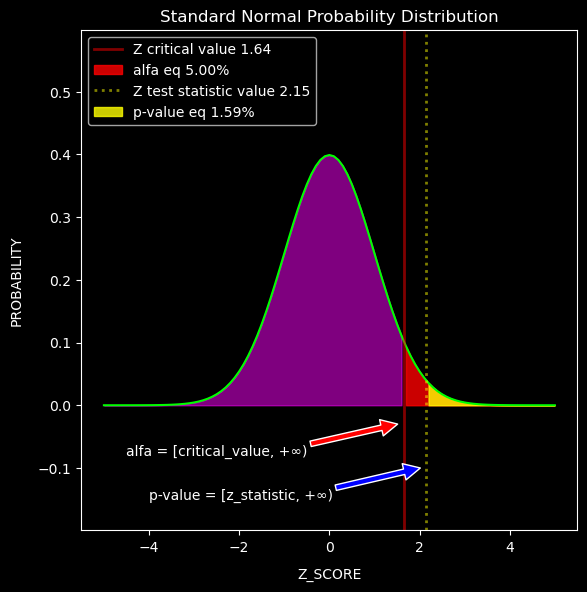

In [5]:
# plotting a compatible Z Distribution in order to show where the Z main statistic above is placed compared to the critical value, as well
# as how much greater or smaller p-value area is when compared to alfa area. Observe that for Z probability distributions we have no degrees 
# of freedom, as we have for other distributions:

# defining a function to calculate the probability density function value for a given z, not cummulative (for z, individually)
# def calculate_prob_from_z_not_cumulative(std_normal_z):
#     return stats.norm.pdf(std_normal_z)

# creating x_axis and y_axis values lists
z_score_x_axis_list = np.arange(-5.00,5.01,0.1)
# z_score_y_axis_list = list(map(calculate_prob_from_z_not_cumulative, z_score_x_axis_list))
z_score_y_axis_list = list(map(lambda std_normal_z:stats.norm.pdf(std_normal_z), z_score_x_axis_list))

# tabulating data into a pandas dataframe
z_score_dataframe = pd.DataFrame(columns=["Z_SCORE", "PROBABILITY"])
z_score_dataframe["Z_SCORE"] = z_score_x_axis_list
z_score_dataframe["PROBABILITY"] = z_score_y_axis_list
print(f"{z_score_dataframe.loc[0:z_score_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(z_score_x_axis_list, z_score_y_axis_list, color="lime")
ax.set_xlabel("Z_SCORE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=z_score_dataframe.Z_SCORE, y1=z_score_dataframe.PROBABILITY, y2=0, where=z_score_dataframe.Z_SCORE<raw_prod_mass_in_grams_z_test_critical_value, color="fuchsia", alpha=0.5)
ax.axvline(raw_prod_mass_in_grams_z_test_critical_value, alpha=0.5, linestyle=('-'), label=f"Z critical value {round(raw_prod_mass_in_grams_z_test_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=z_score_dataframe.Z_SCORE, y1=z_score_dataframe.PROBABILITY, y2=0, where=z_score_dataframe.Z_SCORE>=raw_prod_mass_in_grams_z_test_critical_value, color="red", alpha=0.8, label=f"alfa eq {raw_prod_mass_in_grams_z_test_alfa*100:.2f}%")
ax.axvline(raw_prod_mass_in_grams_z_test_statistic, alpha=0.5, linestyle=(":"), label=f"Z test statistic value {round(raw_prod_mass_in_grams_z_test_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=z_score_dataframe.Z_SCORE, y1=z_score_dataframe.PROBABILITY, y2=0, where=z_score_dataframe.Z_SCORE>=raw_prod_mass_in_grams_z_test_statistic, color="yellow", alpha=0.8, label=f"p-value eq {round(raw_prod_mass_in_grams_z_test_p_value*100,2)}%")
ax.set_title("Standard Normal Probability Distribution")
ax.set_ymargin(0.5)
ax.annotate('alfa = [critical_value, +∞)', xy=(raw_prod_mass_in_grams_z_test_critical_value-0.13, -0.03), xytext=(-4.5, -0.08), arrowprops=dict(facecolor='red')) 
ax.annotate('p-value = [z_statistic, +∞)', xy=(raw_prod_mass_in_grams_z_test_statistic-0.13, -0.1), xytext=(-4, -0.15), arrowprops=dict(facecolor='blue'))
fig.set_figheight(6.5)
plt.legend(loc="upper left")
plt.show()


### Monovariated mean test on a Student-t or T probability distribution (T-test of a single variable mean)

![t-test-means-monovariated](t-test-means-monovariated.png)

In [6]:
# this is a test similar to the test above, except for the fact that the distribution used is the Student-t probability distribution and the 
# main statistic formula uses the sample standard deviation instead of the population standard deviation. This is an alternative test for the
# test above, when we don't have the population (historical) sd available and when we have small populations (n). Also, differently from
# the Z-test, Student-t test uses a degree of freedom of n-1. The analysis regarding the main statistic calculated, its p-value, the alfa
# and its critical t value is the same. Both Z and Student-t probability distributions are symmetric and may have a two-tailed or one-tailed
# (right or left) test analysis to be done, according to the problem.

In [7]:
# Case: the mean processing time for a certain product at a production line has been historically 18 minutes. Improvements have been done 
# on the production line and 25 samples have been considered, being the new mean processing time, now, 16.808 minutes, with a sample standard 
# deviation of 2.733 minutes. Check out if there has been any improvements on the processing time. Consider a significance level of 1% and
# degrees of freedom of n-1.

H0 = "Both sample and population (historical) processing time means are statistically equal."
H1 = "Sample current processing time mean is smaller than population (historical) mean, therefore, processing time has improved (to a lower value) and production line is thus more efficient than it was before."

# descriptive statistics for historical (population) and current (sample) values
processing_time_in_minutes_population_mean = 18
# processing_time_in_minutes_population_sd -> UNKNOWN
processing_time_in_minutes_sample_mean = 16.808
processing_time_in_minutes_sample_sd = 2.733
processing_time_in_minutes_sample_n = 25

# descriptive statistics for the Student-t test itself
processing_time_in_minutes_t_test_alfa = 0.01
processing_time_in_minutes_t_degrees_of_freedom = processing_time_in_minutes_sample_n-1

# calculating Student-t main test statistic (from both our sample and population descriptive statistics):
processing_time_in_minutes_t_test_statistic = (processing_time_in_minutes_sample_mean-processing_time_in_minutes_population_mean)/(processing_time_in_minutes_sample_sd/np.sqrt(processing_time_in_minutes_sample_n))

# here we wanna check if the sample values mean is significantly smaller than the population values mean, so the analysis should be done on 
# the left tail of the Student-t distribution                                                                                      
# calculating p-value area from T at the left tail:
processing_time_in_minutes_t_test_p_value = stats.t.cdf(processing_time_in_minutes_t_test_statistic, df=processing_time_in_minutes_t_degrees_of_freedom)

# calculating critical T value, on the left tail (negative), for significance level (alfa) of 1%
processing_time_in_minutes_t_test_critical_value = stats.t.ppf(processing_time_in_minutes_t_test_alfa, df=processing_time_in_minutes_t_degrees_of_freedom)

# Now, we can do the hypothesis test analysis taking into account the test statistics above (on the left tail of our distribution):
print("Analysis on the left tail of the Student-t probability distribution:")
if(processing_time_in_minutes_t_test_statistic<=processing_time_in_minutes_t_test_critical_value):
    print(f"T test statistic {processing_time_in_minutes_t_test_statistic} is smaller than the T test critical value {processing_time_in_minutes_t_test_critical_value} for a significance alfa of {processing_time_in_minutes_t_test_alfa}. Equivalently, the p-value area {processing_time_in_minutes_t_test_p_value} is smaller than the alfa area {processing_time_in_minutes_t_test_alfa}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"T test statistic {processing_time_in_minutes_t_test_statistic} is greater than the T test critical value {processing_time_in_minutes_t_test_critical_value} for a significance alfa of {processing_time_in_minutes_t_test_alfa}. Equivalently, the p-value area {processing_time_in_minutes_t_test_p_value} is greater than the alfa area {processing_time_in_minutes_t_test_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0

# Conclusion
print(conclusion)

Analysis on the left tail of the Student-t probability distribution:
T test statistic -2.1807537504573733 is greater than the T test critical value -2.4921594731575762 for a significance alfa of 0.01. Equivalently, the p-value area 0.01961718370694039 is greater than the alfa area 0.01. Therefore, H0 is NOT rejected and H1 is NOT confirmed !
Both sample and population (historical) processing time means are statistically equal.


     T_SCORE  PROBABILITY
0       -5.0     0.000053
1       -4.9     0.000068
2       -4.8     0.000088
3       -4.7     0.000113
4       -4.6     0.000146
..       ...          ...
96       4.6     0.000146
97       4.7     0.000113
98       4.8     0.000088
99       4.9     0.000068
100      5.0     0.000053

[101 rows x 2 columns]




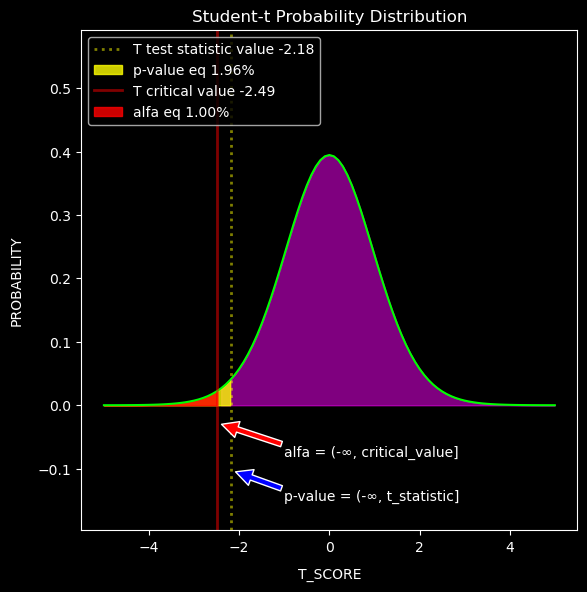

In [8]:
# plotting a compatible T Distribution in order to show where the T main statistic above is placed compared to the critical value, as well
# as how much greater or smaller p-value area is when compared to alfa area. Observe that for T probability distributions we have a degree 
# of freedom of n-1, which is used on the calculation of pdf, cdf and ppf:

# creating x_axis and y_axis values lists
t_score_x_axis_list = np.arange(-5.00,5.01,0.1)
t_score_y_axis_list = list(map(lambda t:stats.t.pdf(t, df=processing_time_in_minutes_t_degrees_of_freedom), t_score_x_axis_list))

# tabulating data into a pandas dataframe
t_score_dataframe = pd.DataFrame(columns=["T_SCORE", "PROBABILITY"])
t_score_dataframe["T_SCORE"] = t_score_x_axis_list
t_score_dataframe["PROBABILITY"] = t_score_y_axis_list
print(f"{t_score_dataframe.loc[0:t_score_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(t_score_x_axis_list, t_score_y_axis_list, color="lime")
ax.set_xlabel("T_SCORE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE>processing_time_in_minutes_t_test_critical_value, color="fuchsia", alpha=0.5)
ax.axvline(processing_time_in_minutes_t_test_statistic, alpha=0.5, linestyle=(":"), label=f"T test statistic value {round(processing_time_in_minutes_t_test_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE<=processing_time_in_minutes_t_test_statistic, color="yellow", alpha=0.8, label=f"p-value eq {round(processing_time_in_minutes_t_test_p_value*100,2)}%")
ax.axvline(processing_time_in_minutes_t_test_critical_value, alpha=0.5, linestyle=('-'), label=f"T critical value {round(processing_time_in_minutes_t_test_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE<=processing_time_in_minutes_t_test_critical_value, color="red", alpha=0.8, label=f"alfa eq {processing_time_in_minutes_t_test_alfa*100:.2f}%")
ax.set_title("Student-t Probability Distribution")
ax.set_ymargin(0.5)
ax.annotate('alfa = (-∞, critical_value]', xy=(processing_time_in_minutes_t_test_critical_value+0.1, -0.03), xytext=(-1, -0.08), arrowprops=dict(facecolor='red')) 
ax.annotate('p-value = (-∞, t_statistic]', xy=(processing_time_in_minutes_t_test_statistic+0.1, -0.105), xytext=(-1, -0.15), arrowprops=dict(facecolor='blue'))
fig.set_figheight(6.5)
plt.legend(loc="upper left")
plt.show()

### Multivariated Pearson Correlation Coefficient test on a Student-t or T probability distribution (T-test for multivariated correlation)

![t-test-correlation-multivariated](t-test-correlation-multivariated.png)

In [9]:
# Case: In a previous section, regarding covariance and pearson correlation coefficient descriptive statistics, we've partially performed a pearson
# correlation analysis about the correlation between student's grades at three different disciplines (math, physics and literature) in order
# to investigate if there was any correlation between the grades when these 3 disciplines were taken two by two. For instance, if students
# that went well in some of these disciplines also tended to be well, or worse, on the other two. At the time, we simply managed to calculate
# the pearson correlation coefficient of each pair of such disciplines, having as results:
# - math_physics_sample_pearson_correlation_coefficient = 0.6025321124160095
# - math_literature_sample_pearson_correlation_coefficient = -0.30878277832686235
# - physics_literature_sample_pearson_correlation_coefficient = -0.28956102521926375
# As we mentioned there, we still had to talk about probability distributions and hypothesis test analysis, and that it was not sufficient
# to have calculated the descriptive statistics themselves, particularly the correlation coefficient, as we couldn't, at the time, measure 
# the significance level of such results - if they were significantly different or not. Consequently, we couldn't come out with a final 
# conclusion back then. Now we can !
# So, assuming we already have all descriptive measures calculated, we here present the way of testing the statistical significance for each
# of these results, in order to prove our hypothesis about the existence of a correlation or not for each discipline's pair.

# The referred previous section with the calculation of covariance and pearson correlation coefficient for this case:
# https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/covariance-pearson-correlation-coefficient.ipynb

In [10]:
# H0 = "Correlation between these two disciplines is statistically zero, considered a 5% significance level"
# H1 = "Correlation between these two disciplines is statistically significant, considered a 5% significance level"

# as we can see for the hypothesis above, what's being tested is not specifically a superiority or inferiority of measures, but simply
# the existence of a difference. As commented above, this means a two-tailed hypothesis analysis. For that, we can either divide the alfa
# in two (one for each tail) or we can double the p_value, considering the two-tailed p_value (the sum of the p_values from each tail).
# The important here is to analyse two-tailed values with two-tailed values, and avoid the error of analysing any one-tailed value with
# a two-tailed one.

# previously calculated descriptive statistics
math_physics_sample_pearson_correlation_coefficient = 0.6025321124160095
math_literature_sample_pearson_correlation_coefficient = -0.30878277832686235
physics_literature_sample_pearson_correlation_coefficient = -0.28956102521926375
my_n = 30

# descriptive statistics given now
my_two_tailed_alfa = 0.05
my_degrees_of_freedom = my_n-2

# "r" on the formula above is the correlation coefficient value
# calculating Student-t main test statistic (for each pair of disciplines)
math_physics_t_test_statistic = (math_physics_sample_pearson_correlation_coefficient)/np.sqrt((1-np.square(math_physics_sample_pearson_correlation_coefficient))/(my_n-2))
math_literature_t_test_statistic = (math_literature_sample_pearson_correlation_coefficient)/np.sqrt((1-np.square(math_literature_sample_pearson_correlation_coefficient))/(my_n-2))
physics_literature_t_test_statistic = (physics_literature_sample_pearson_correlation_coefficient)/np.sqrt((1-np.square(physics_literature_sample_pearson_correlation_coefficient))/(my_n-2))

# calculating two-tailed p-value (for each pair of disciplines)
# if we look at the value of the t_statistics above, the math_physics' is positive, the other two are negative. That is, the math_physics'
# t_statistic above is the value at the right tail, and the other two pairs' values are the values on the left tail. That also means the 
# math_physics' may represent a directly proportional correlation, while the other two pairs' may represent an inversely proportional 
# correlation. 
# We can take the module of each one to calculate the p-value on the right tail (for each of them), and then double the p-value to have the 
# two-tailed p-value comparable to our two-tailed alfa - or we could compare half our two-tailed alfa with a one-tailed p-value (without 
# doubling it)
math_physics_t_test_two_tailed_p_value = 2*(1-stats.t.cdf(np.absolute(math_physics_t_test_statistic), df=my_degrees_of_freedom))
math_literature_t_test_two_tailed_p_value = 2*(1-stats.t.cdf(np.absolute(math_literature_t_test_statistic), df=my_degrees_of_freedom))
physics_literature_t_test_two_tailed_p_value = 2*(1-stats.t.cdf(np.absolute(physics_literature_t_test_statistic), df=my_degrees_of_freedom))

# calculating the T critical value for our two-tailed alfa of 5%
# as our analysis is a two-tailed one, and as the T distribution is symmetric, our alfa on the left tail is 2.5% and our alfa on the right
# tail is 2.5%. If we wanna calculate the critical value of t, for each tail, we gotta use the half alfa (2.5%), instead of the 
# two-tailed one (5%). The critical value does not depend on the variables (disciplines) or any of its statistics, it only depends on the 
# alfa and degrees of freedom, which are instrinsic to the distribution itself... so here we calculate only one t critical value for each 
# tail, not mattering what or how many disciplines' t-test statistics we wanna test later on that critical (significant) area of our 
# distribution
my_left_tail_t_test_critical_value = stats.t.ppf(0.025, df=my_degrees_of_freedom)
my_right_tail_t_test_critical_value = stats.t.ppf(1-0.025, df=my_degrees_of_freedom)

# Now that we have all necessary hypothesis test statistics, we can simply interpret our results as usual (just being careful to compare
# each tail values only with other each tail values and two-tailed values with only other two-tailed values)
# analysis on the left tail, right tail and both tails of the Student-t probability distribution:
# defining a generic function to analyse the significance of each possible correlation between two disciplines
def analyse_result_t_test(t_test_one_tailed_statistic, t_test_two_tailed_p_value, t_test_one_tailed_critical_value, t_test_two_tailed_alfa, t_test_degrees_of_freedom):
    if(t_test_one_tailed_statistic<0):
        print("*** Left tail and both tail analysis ***")
        if(t_test_one_tailed_statistic<=t_test_one_tailed_critical_value):
            print(f"T test statistic {t_test_one_tailed_statistic} is smaller than (or equal) the T test critical value {t_test_one_tailed_critical_value} for a significance two-tailed alfa of {t_test_two_tailed_alfa} and for {t_test_degrees_of_freedom} degrees of freedom. Equivalently, the two-tailed p-value area {t_test_two_tailed_p_value} is smaller than the two-tailed alfa area {t_test_two_tailed_alfa}. Therefore, H0 is rejected and H1 confirmed !")
        else:
            print(f"T test statistic {t_test_one_tailed_statistic} is greater than the T test critical value {t_test_one_tailed_critical_value} for a significance two-tailed alfa of {t_test_two_tailed_alfa} and for {t_test_degrees_of_freedom} degrees of freedom. Equivalently, the two-tailed p-value area {t_test_two_tailed_p_value} is greater than the two-tailed alfa area {t_test_two_tailed_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    elif(t_test_one_tailed_statistic>0):
        print("*** Right tail and both tail analysis ***")
        if(t_test_one_tailed_statistic>=t_test_one_tailed_critical_value):
            print(f"T test statistic {t_test_one_tailed_statistic} is greater than (or equal) the T test critical value {t_test_one_tailed_critical_value} for a significance two-tailed alfa of {t_test_two_tailed_alfa} and for {t_test_degrees_of_freedom} degrees of freedom. Equivalently, the two-tailed p-value area {t_test_two_tailed_p_value} is smaller than the two-tailed alfa area {t_test_two_tailed_alfa}. Therefore, H0 is rejected and H1 confirmed !")
        else:
            print(f"T test statistic {t_test_one_tailed_statistic} is smaller than the T test critical value {t_test_one_tailed_critical_value} for a significance two-tailed alfa of {t_test_two_tailed_alfa} and for {t_test_degrees_of_freedom} degrees of freedom. Equivalently, the two-tailed p-value area {t_test_two_tailed_p_value} is greater than the two-tailed alfa area {t_test_two_tailed_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    else:
        print(f"T test statistic is ZERO ! Therefore, there's no difference between the analysed variables (disciplines) and also no need to analyse the t_test statistic at the probability distribution! A zero hypothesis test statistic will never be statistically significant. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")

print("Correlation t test between Math and Physics disciplines:")
analyse_result_t_test(math_physics_t_test_statistic, math_physics_t_test_two_tailed_p_value, my_right_tail_t_test_critical_value, my_two_tailed_alfa, my_degrees_of_freedom)

print("Correlation t test between Math and Literature disciplines:")
analyse_result_t_test(math_literature_t_test_statistic, math_literature_t_test_two_tailed_p_value, my_left_tail_t_test_critical_value, my_two_tailed_alfa, my_degrees_of_freedom)

print("Correlation t test between Physics and Literature disciplines:")
analyse_result_t_test(physics_literature_t_test_statistic, physics_literature_t_test_two_tailed_p_value, my_left_tail_t_test_critical_value, my_two_tailed_alfa, my_degrees_of_freedom)

print("*** Conclusion ***")
print("Only the correlation between Math and Physics is statistically significant, for an alfa of 5% and 28 degrees of freedom. "+
"Correlations between Math and Literature and between Physics and Literature are NOT statistically significant, thus may be considered "+
"ZERO !")

Correlation t test between Math and Physics disciplines:
*** Right tail and both tail analysis ***
T test statistic 3.9948899481293094 is greater than (or equal) the T test critical value 2.048407141795244 for a significance two-tailed alfa of 0.05 and for 28 degrees of freedom. Equivalently, the two-tailed p-value area 0.0004260030729539288 is smaller than the two-tailed alfa area 0.05. Therefore, H0 is rejected and H1 confirmed !
Correlation t test between Math and Literature disciplines:
*** Left tail and both tail analysis ***
T test statistic -1.7178728870656619 is greater than the T test critical value -2.048407141795244 for a significance two-tailed alfa of 0.05 and for 28 degrees of freedom. Equivalently, the two-tailed p-value area 0.09686159239065995 is greater than the two-tailed alfa area 0.05. Therefore, H0 is NOT rejected and H1 is NOT confirmed !
Correlation t test between Physics and Literature disciplines:
*** Left tail and both tail analysis ***
T test statistic -1.60

     T_SCORE  PROBABILITY
0       -5.0     0.000038
1       -4.9     0.000050
2       -4.8     0.000065
3       -4.7     0.000086
4       -4.6     0.000113
..       ...          ...
96       4.6     0.000113
97       4.7     0.000086
98       4.8     0.000065
99       4.9     0.000050
100      5.0     0.000038

[101 rows x 2 columns]




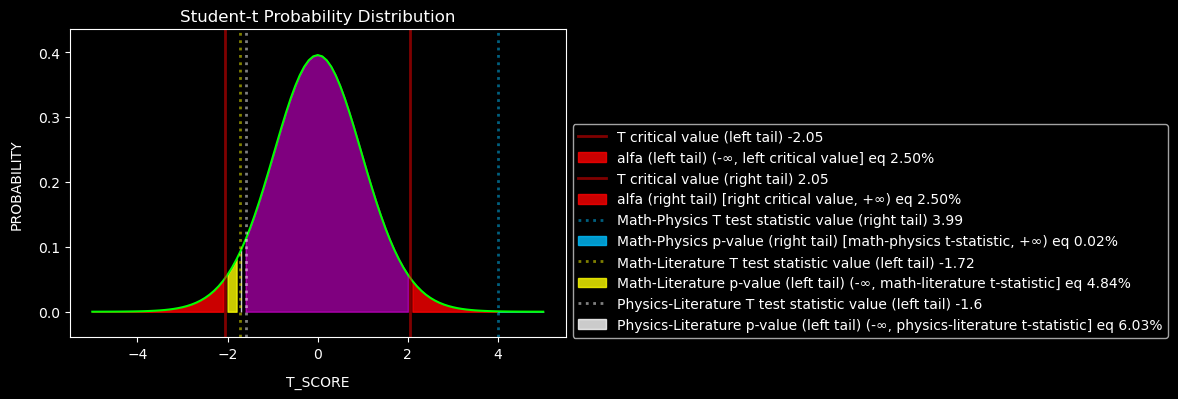

In [11]:
# plotting a compatible T Distribution in order to show where the T main statistic above is placed compared to the critical value, as well
# as how much greater or smaller p-value area is when compared to alfa area. Observe that for T probability distributions, in this case,
# we have a degree of freedom of n-2, which is used on the calculation of pdf, cdf and ppf. The only differences of this t probability 
# distribution to the latest are the different number of degrees of freedom,as well as the different alfa and the different t critical 
# values. The t statistic itself and its p-value do not affect the curve or the distribution, they only alter the analysis and results. 
# In this example, we have 3 main t statistics to analyse regarding the same t critical values and alfa (on the right and on the left tails), 
# that is, the same critical regions on the same probability distribution. So we start by defining the critical regions (alfa, critical value)
# and then analyse each of the three test statistics (of each disciplines pair) relatively to those regions.

# creating x_axis and y_axis values lists
t_score_x_axis_list = np.arange(-5.00,5.01,0.1)
t_score_y_axis_list = list(map(lambda t:stats.t.pdf(t, df=my_degrees_of_freedom), t_score_x_axis_list))

# tabulating data into a pandas dataframe
t_score_dataframe = pd.DataFrame(columns=["T_SCORE", "PROBABILITY"])
t_score_dataframe["T_SCORE"] = t_score_x_axis_list
t_score_dataframe["PROBABILITY"] = t_score_y_axis_list
print(f"{t_score_dataframe.loc[0:t_score_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(t_score_x_axis_list, t_score_y_axis_list, color="lime")
ax.set_xlabel("T_SCORE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE>physics_literature_t_test_statistic) & (t_score_dataframe.T_SCORE<my_right_tail_t_test_critical_value), color="fuchsia", alpha=0.5)
ax.axvline(my_left_tail_t_test_critical_value, alpha=0.5, linestyle=('-'), label=f"T critical value (left tail) {round(my_left_tail_t_test_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE<=my_left_tail_t_test_critical_value, color="red", alpha=0.8, label=f"alfa (left tail) (-∞, left critical value] eq {my_two_tailed_alfa/2*100:.2f}%")
ax.axvline(my_right_tail_t_test_critical_value, alpha=0.5, linestyle=('-'), label=f"T critical value (right tail) {round(my_right_tail_t_test_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE>=my_right_tail_t_test_critical_value, color="red", alpha=0.8, label=f"alfa (right tail) [right critical value, +∞) eq {my_two_tailed_alfa/2*100:.2f}%")
ax.axvline(math_physics_t_test_statistic, alpha=0.5, linestyle=(":"), label=f"Math-Physics T test statistic value (right tail) {round(math_physics_t_test_statistic,2)}", color="deepskyblue", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE>=math_physics_t_test_statistic, color="deepskyblue", alpha=0.8, label=f"Math-Physics p-value (right tail) [math-physics t-statistic, +∞) eq {round(math_physics_t_test_two_tailed_p_value/2*100,2)}%")
ax.axvline(math_literature_t_test_statistic, alpha=0.5, linestyle=(":"), label=f"Math-Literature T test statistic value (left tail) {round(math_literature_t_test_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE<=math_literature_t_test_statistic) & (t_score_dataframe.T_SCORE>my_left_tail_t_test_critical_value), color="yellow", alpha=0.8, label=f"Math-Literature p-value (left tail) (-∞, math-literature t-statistic] eq {round(math_literature_t_test_two_tailed_p_value/2*100,2)}%")
ax.axvline(physics_literature_t_test_statistic, alpha=0.5, linestyle=(":"), label=f"Physics-Literature T test statistic value (left tail) {round(physics_literature_t_test_statistic,2)}", color="white", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE<=physics_literature_t_test_statistic) & (t_score_dataframe.T_SCORE>math_literature_t_test_statistic), color="white", alpha=0.8, label=f"Physics-Literature p-value (left tail) (-∞, physics-literature t-statistic] eq {round(physics_literature_t_test_two_tailed_p_value/2*100,2)}%")
ax.set_title("Student-t Probability Distribution")
ax.set_ymargin(0.1)
fig.set_figheight(4)
ax.legend(bbox_to_anchor=(1, 0.715))
plt.show()

### Mono and multivariated Chi-square test on a Chi-square probability distribution (Chi-square test for mono and multivariated chi-square measures)

![chi-square-test-monovariated](chi-square-test-monovariated.png)

In [12]:
# Case: in a previous example, at chi-square probability distribution section, it has been shown an example of how to use chi-square 
# distributions and the respective chi-square test to analyse two categorical (qualitative) variables, at a contingency table, in order to 
# tell if their frequencies were significantly related or not. That was a bivariated example, on which we followed the formula above, being
# the calculated residuals the (Observed - Expected) frequencies, which were elevated to the 2nd power and divided by the Expected 
# frequencies, in order to give us each partial chi-square value. Next, all chi-square values were summed up to give the total chi-square 
# statistic value, from which it was calculated the p-valor, for n-1 degrees of freedom, and both were compared to the alfa and critical 
# value on a chi-square probability distribution. 

# The referred previous section with the calculation of a chi-square statistic for two variables:
# https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/chi-square.ipynb

# Here, we show another example, but, in this case, a monovariated one, in which we compare observed and expected frequencies of the same 
# variable to check if they're in accordance (not statistically different) or not (statistically different). As we have only one variable, 
# no contingency (cross-table) table is needed, only a normal table.

# A shop wanna check if its daily sales are related to the respective day of the week or not, that is, if the sales for each week day are in 
# accordance to what it is expected to be sold on that week day. Data randomly collected from the 7 week days have been gathered as a sample
# and the sales frequency calculated for each day. Calculate if these sample observed frequencies are statistically in accordance with the 
# expected frequencies or if there is any significant difference between them. The considered expected frequencies are the total sales 
# divided by the seven days of week, with ideally an equal distribution of sales per day. Degrees of freedom are k-1, being k the number
# of categories for the unique variable, in this case, the number of week days. Consider significance level as 5%.

H0 = "Observed and expected sales for each week day are statistically equal"
H1 = "Observed and expected sales for each week day are statistically different"

In [13]:
# 1D-ndarray with observed sales frequencies for Sunday, Monday, Tuesday, Wednesday, Thursday, Friday and Saturday
my_observed_absolute_freq_ndarray = np.array([35,24,27,32,25,36,31])

# calculating expected sales frequencies
equally_distributed_frequencies_per_each_day = (int)(my_observed_absolute_freq_ndarray.sum()/my_observed_absolute_freq_ndarray.size)
my_expected_absolute_freq_ndarray = np.full(shape=(my_observed_absolute_freq_ndarray.size), fill_value=equally_distributed_frequencies_per_each_day)

# chi-square distributions have x values always non-negative, therefore only the right tail is considered in a chi-square distribution
# defining a function to calculate the total chi-square test statistic (always on the right tail)
def calculate_chi_square_total(observed_values_list, expected_values_list):
    chi_square_total = 0
    for i in range(0,observed_values_list.size,1):
        chi_square_total += np.square(observed_values_list[i]-expected_values_list[i])/expected_values_list[i]
    return chi_square_total
my_chi_square_total = calculate_chi_square_total(my_observed_absolute_freq_ndarray, my_expected_absolute_freq_ndarray)

# calculating degrees of freedom for the week 7-day variable
my_degrees_of_freedom = my_observed_absolute_freq_ndarray.size-1

# calculating p_value for the chi-square total test statistic (always on the right tail)
my_p_value = 1-stats.chi2.cdf(my_chi_square_total, df=my_degrees_of_freedom)

# significance level (alfa) (always on the right tail)
my_alpha = 0.05

# calculating qui-square critical value (always on the right tail)
my_critical_value = stats.chi2.ppf(1-my_alpha, df=my_degrees_of_freedom)

print(f"my_observed_absolute_freq_ndarray = {my_observed_absolute_freq_ndarray}")
print(f"my_expected_absolute_freq_ndarray = {my_expected_absolute_freq_ndarray}")
print(f"my_degrees_of_freedom = {my_degrees_of_freedom}")
print(f"my_alfa = {my_alpha}")
print(f"my_critical_value = {my_critical_value}")
print(f"my_chi_square_total = {my_chi_square_total}")
print(f"my_p_value = {my_p_value}\n")

# Now, we can do the hypothesis test analysis taking into account the test statistics above (always on the right tail):
print("Analysis on the right tail of the Chi-square probability distribution:")
if(my_chi_square_total>=my_critical_value):
    print(f"Chi-square test statistic {my_chi_square_total} is greater than the Chi-square test critical value {my_critical_value} for a significance alfa of {my_alpha}. Equivalently, the p-value area {my_p_value} is smaller than the alfa area {my_alpha}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"Chi-square test statistic {my_chi_square_total} is smaller than the Chi-square test critical value {my_critical_value} for a significance alfa of {my_alpha}. Equivalently, the p-value area {my_p_value} is greater than the alfa area {my_alpha}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0
print("Conclusion: "+conclusion+". The shop is selling what it is expected to sell, with regularly distributed frequencies of sales per week day.")


my_observed_absolute_freq_ndarray = [35 24 27 32 25 36 31]
my_expected_absolute_freq_ndarray = [30 30 30 30 30 30 30]
my_degrees_of_freedom = 6
my_alfa = 0.05
my_critical_value = 12.591587243743977
my_chi_square_total = 4.533333333333333
my_p_value = 0.604896932741938

Analysis on the right tail of the Chi-square probability distribution:
Chi-square test statistic 4.533333333333333 is smaller than the Chi-square test critical value 12.591587243743977 for a significance alfa of 0.05. Equivalently, the p-value area 0.604896932741938 is greater than the alfa area 0.05. Therefore, H0 is NOT rejected and H1 is NOT confirmed !
Conclusion: Observed and expected sales for each week day are statistically equal. The shop is selling what it is expected to sell, with regularly distributed frequencies of sales per week day.


    CHI_SQUARE  PROBABILITY
0          1.0     0.037908
1          1.5     0.066427
2          2.0     0.091970
3          2.5     0.111916
4          3.0     0.125511
..         ...          ...
45        23.5     0.000272
46        24.0     0.000221
47        24.5     0.000180
48        25.0     0.000146
49        25.5     0.000118

[50 rows x 2 columns]




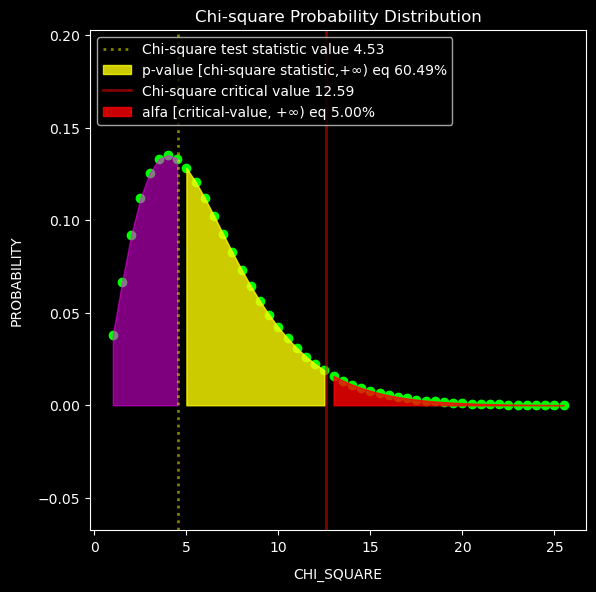

In [14]:
# plotting a compatible Chi-square Distribution in order to show where the Chi-square main statistic above is placed compared to the critical
# value, as well as how much greater or smaller p-value area is when compared to alfa area. Observe that for Chi-square probability 
# distributions we have a degree of freedom of k-1 (k being the number of categories for the qualitative variable), which is used on the 
# calculation of pdf, cdf and ppf:

# creating x_axis and y_axis values lists
chi_square_x_axis_list = np.arange(1,26,0.5)
chi_square_y_axis_list = list(map(lambda chi_square:stats.chi2.pdf(chi_square, df=my_degrees_of_freedom), chi_square_x_axis_list))

# tabulating data into a pandas dataframe
chi_square_dataframe = pd.DataFrame(columns=["CHI_SQUARE", "PROBABILITY"])
chi_square_dataframe["CHI_SQUARE"] = chi_square_x_axis_list
chi_square_dataframe["PROBABILITY"] = chi_square_y_axis_list
with pd.option_context('display.max_rows',10):
    print(f"{chi_square_dataframe.loc[0:chi_square_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph 
# chi-square distributions are discrete, generalized here to a continuous distribution only for the purpose of facilitating the viewing of 
# the critical and non-critical areas, but, in reality, the values under the curve are not continuous, as well as their respective areas
fig, ax = plt.subplots()
ax.scatter(chi_square_x_axis_list, chi_square_y_axis_list, color="lime")
ax.set_xlabel("CHI_SQUARE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=chi_square_dataframe.CHI_SQUARE, y1=chi_square_dataframe.PROBABILITY, y2=0, where=chi_square_dataframe.CHI_SQUARE<my_chi_square_total, color="fuchsia", alpha=0.5)
ax.axvline(my_chi_square_total, alpha=0.5, linestyle=(":"), label=f"Chi-square test statistic value {round(my_chi_square_total,2)}", color="yellow", linewidth=2)
ax.fill_between(x=chi_square_dataframe.CHI_SQUARE, y1=chi_square_dataframe.PROBABILITY, y2=0, where=(chi_square_dataframe.CHI_SQUARE>=my_chi_square_total) & (chi_square_dataframe.CHI_SQUARE<my_critical_value), color="yellow", alpha=0.8, label=f"p-value [chi-square statistic,+∞) eq {round(my_p_value*100,2)}%")
ax.axvline(my_critical_value, alpha=0.5, linestyle=('-'), label=f"Chi-square critical value {round(my_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=chi_square_dataframe.CHI_SQUARE, y1=chi_square_dataframe.PROBABILITY, y2=0, where=chi_square_dataframe.CHI_SQUARE>=my_critical_value, color="red", alpha=0.8, label=f"alfa [critical-value, +∞) eq {my_alpha*100:.2f}%")
ax.set_title("Chi-square Probability Distribution")
ax.set_ymargin(0.5)
fig.set_figheight(6.5)
plt.legend(loc="upper left")
plt.show()

### Bivariated analysis of variance test on a Fisher-Snedecor (F) probability distribution (F test of equality of variances)

![f-test-variance-bivariated](f-test-variance-bivariated.png)

In [15]:
# An F-test is any statistical test used to compare the variances of two samples or the ratio of variances between multiple samples. 
# The test statistic, random variable F, is used to determine if the tested data has an F-distribution under the true null hypothesis, 
# and true customary assumptions about the error term (ε). It is most often used when comparing statistical models that have been 
# fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. Exact "F-tests" 
# mainly arise when the models have been fitted to the data using least squares. The name was coined by George W. Snedecor, in honour 
# of Ronald Fisher. Fisher initially developed the statistic as the variance ratio in the 1920s. Use examples are testes regarding:
# the hypothesis that the means of a given set of normally distributed, the hypothesis that a proposed regression model fits the data 
# well, the hypothesis that a data set in a regression analysis follows the simpler of two proposed linear models that are nested within 
# each other, multiple-comparison testing is conducted using needed data in already completed F-test, etc.

# The formula used to calculate the main statistic of an F-test is simply the highest variance divided by the lowest variance, considering
# the variances of each of the two variables being compared. The degrees of freedom value also is separately calculated, one for the 
# numerator (n(A)-1) and one for the denominator (n(B)-1). The n values are related to each variable number of elements in each respective 
# sample.

# the x-axis Domain is always non-negative real numbers, as F values are always positive. The analysis is always on the right tail of the
# F distribution.

In [16]:
# Case: in a route analysis, a logistic company is trying to evaluate if a B route has a greater variability (less predictability), 
# regarding the delivery time, to one same client, compared to an A route. A sample of delivery times, for A and B routes, have been 
# collected during 35 days. Is there any statistical difference between the variance of the two routes regarding the delivery time 
# means ? Consider significance leve as 5%.

H0 = "There is no significant statistical difference between the variability or predictability (variance) of delivery times between the two routes"
H1 = "B route has a significantly higher variability (and less predictability) (variance) when compared to A route"

In [17]:
# given data
a_route_delivery_time_sample = [121,109,107,111,101,132,110,117,132,104,127,120,126,112,108,138,116,105,117,129,133,109,105,122,137,119,120,124,106,108,136,116,113,118,109]
b_route_delivery_time_sample = [90,120,93,110,91,115,88,124,99,74,81,104,77,79,115,88,119,81,120,80,116,133,93,111,114,87,103,99,116,102,81,99,118,126,97]
f_test_alfa = 0.05

# calculating means and sample variances (ddof=1) for A and B routes' delivery time values
a_route_mean = np.sum(a_route_delivery_time_sample)/np.count_nonzero(a_route_delivery_time_sample)
b_route_mean = np.sum(b_route_delivery_time_sample)/np.count_nonzero(b_route_delivery_time_sample)
a_route_var = np.var(a=a_route_delivery_time_sample, ddof=1)
b_route_var = np.var(a=b_route_delivery_time_sample, ddof=1)

# calculating degrees of freedom of the numerator (dfn) and denominator (dfd) respective variables
b_route_dfn = np.count_nonzero(b_route_delivery_time_sample)-1
a_route_dfd = np.count_nonzero(a_route_delivery_time_sample)-1

# calculating F test main statistic
f_test_route_statistic = b_route_var/a_route_var

# calculating p-value for n-1 degrees of freedom on the numerator and denominator
f_test_p_value = 1-stats.f.cdf(f_test_route_statistic, dfn=b_route_dfn, dfd=a_route_dfd)

# calculating critical F value for n-1 degrees of freedom on the numerator and denominator
f_test_critical_value = stats.f.ppf(1-f_test_alfa, dfn=b_route_dfn, dfd=a_route_dfd)

print(f"a_route_delivery_time_sample = {a_route_delivery_time_sample}")
print(f"b_route_delivery_time_sample = {b_route_delivery_time_sample}")
print(f"a_route_mean = {a_route_mean}")
print(f"b_route_mean = {b_route_mean}")
print(f"b_route_dfn = {b_route_dfn}")
print(f"a_route_dfd = {a_route_dfd}")
print(f"f_test_alfa = {f_test_alfa}")
print(f"f_test_critical_value = {f_test_critical_value}")
print(f"f_test_route_statistic = {f_test_route_statistic}")
print(f"f_test_p_value = {f_test_p_value}\n")

# Now, we can do the hypothesis test analysis taking into account the test statistics above (always on the right tail):
print("Analysis of variances on the right tail of the Fisher-Snedecor probability distribution:")
if(f_test_route_statistic>=f_test_critical_value):
    print(f"F test statistic {f_test_route_statistic} is greater than or equal the F test critical value {f_test_critical_value} for a significance alfa of {f_test_alfa}. Equivalently, the p-value area {f_test_p_value} is smaller than the alfa area {f_test_alfa}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"F test statistic {f_test_route_statistic} is smaller than the F test critical value {f_test_critical_value} for a significance alfa of {f_test_alfa}. Equivalently, the p-value area {f_test_p_value} is greater than the alfa area {f_test_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0
print("Conclusion: "+conclusion+". Although the mean of delivery times for the B route, mathematically, is smaller. That is, on route B it takes less time but with a higher variability regarding delivery time to the considered custumer.")

a_route_delivery_time_sample = [121, 109, 107, 111, 101, 132, 110, 117, 132, 104, 127, 120, 126, 112, 108, 138, 116, 105, 117, 129, 133, 109, 105, 122, 137, 119, 120, 124, 106, 108, 136, 116, 113, 118, 109]
b_route_delivery_time_sample = [90, 120, 93, 110, 91, 115, 88, 124, 99, 74, 81, 104, 77, 79, 115, 88, 119, 81, 120, 80, 116, 133, 93, 111, 114, 87, 103, 99, 116, 102, 81, 99, 118, 126, 97]
a_route_mean = 117.62857142857143
b_route_mean = 101.22857142857143
b_route_dfn = 34
a_route_dfd = 34
f_test_alfa = 0.05
f_test_critical_value = 1.772066477170576
f_test_route_statistic = 2.416690805421311
f_test_p_value = 0.005962425871078425

Analysis of variances on the right tail of the Fisher-Snedecor probability distribution:
F test statistic 2.416690805421311 is greater than or equal the F test critical value 1.772066477170576 for a significance alfa of 0.05. Equivalently, the p-value area 0.005962425871078425 is smaller than the alfa area 0.05. Therefore, H0 is rejected and H1 confirmed !


        F   PROBABILITY
0    0.00  0.000000e+00
1    0.05  5.761431e-12
2    0.10  7.764173e-08
3    0.15  1.125071e-05
4    0.20  2.640974e-04
..    ...           ...
96   4.80  1.740823e-05
97   4.85  1.534670e-05
98   4.90  1.353990e-05
99   4.95  1.195509e-05
100  5.00  1.056389e-05

[101 rows x 2 columns]




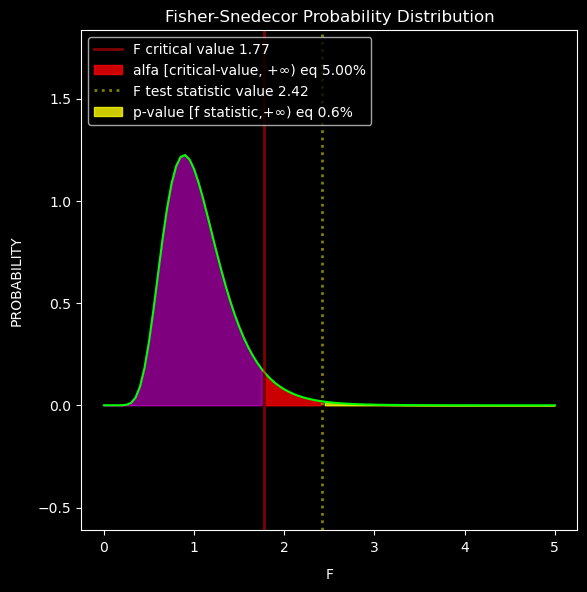

In [18]:
# plotting a compatible Fisher-Snedecor F Distribution in order to show where the F main statistic above is placed compared to the critical
# value, as well as how much greater or smaller p-value area is when compared to alfa area. Observe that for F probability distributions 
# we have a degree of freedom "dfn" of n-1 on the numerator (for the variable of highest variance) and a "dfd" of n-1 on the denominator 
# (for the variable of lowest variance), both of which used on the calculation of pdf, cdf and ppf:

# creating x_axis and y_axis values lists
f_x_axis_list = np.arange(0,5.05,0.05)
f_y_axis_list = list(map(lambda f:stats.f.pdf(f, dfn=b_route_dfn, dfd=a_route_dfd), f_x_axis_list))

# tabulating data into a pandas dataframe
f_dataframe = pd.DataFrame(columns=["F", "PROBABILITY"])
f_dataframe["F"] = f_x_axis_list
f_dataframe["PROBABILITY"] = f_y_axis_list
with pd.option_context('display.max_rows',10):
    print(f"{f_dataframe.loc[0:f_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph 
fig, ax = plt.subplots()
ax.plot(f_x_axis_list, f_y_axis_list, color="lime")
ax.set_xlabel("F", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=f_dataframe.F, y1=f_dataframe.PROBABILITY, y2=0, where=f_dataframe.F<f_test_critical_value, color="fuchsia", alpha=0.5)
ax.axvline(f_test_critical_value, alpha=0.5, linestyle=('-'), label=f"F critical value {round(f_test_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=f_dataframe.F, y1=f_dataframe.PROBABILITY, y2=0, where=(f_dataframe.F>=f_test_critical_value)&(f_dataframe.F<f_test_route_statistic), color="red", alpha=0.8, label=f"alfa [critical-value, +∞) eq {f_test_alfa*100:.2f}%")
ax.axvline(f_test_route_statistic, alpha=0.5, linestyle=(":"), label=f"F test statistic value {round(f_test_route_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=f_dataframe.F, y1=f_dataframe.PROBABILITY, y2=0, where=(f_dataframe.F>=f_test_route_statistic), color="yellow", alpha=0.8, label=f"p-value [f statistic,+∞) eq {round(f_test_p_value*100,2)}%")
ax.set_title("Fisher-Snedecor Probability Distribution")
ax.set_ymargin(0.5)
fig.set_figheight(6.5)
plt.legend(loc="upper left")
plt.show()

### Monovariated mean confidence interval on Z and T distributions

![confidence-interval-z](confidence-interval-z.png) ![confidence-interval-t](confidence-interval-t.png)

In [19]:
# Based on sample descriptive statistics, and Z or T distributions, we can estimate a confidence interval, within which the respective 
# population statistics should also be. This interval, generalized from the sample, guarantees that any statistic within it will have 
# the assumed confidence level, as well as the required significance level (confidence = 1-significance). The confidence level is the 
# probability that, if you repeat the same sample or population statistic calculation, and significance analysis, you'll get the same 
# statistical results, regarding the hypothesis test. One common descriptive statistic, chosen to calculate confidence intervals for, 
# is the mean. If we have, for instance, the sample mean (and other necessary data), we can predict a reasonable range, plus and minus 
# that sample mean, within which the population mean would also be, for a certain confidence and significance levels. The Z or t of the 
# formula above are the critical values calculated from the alfa at the sample Z or T distributions (which define the significant critical 
# areas). In the case of T distribution, with a n-1 degrees of freedom. That Z or t critical value is then multiplied by the standard error 
# (s/sq(n)) of the sample, giving the "estimate" value. This estimate value +- the sample statistic (e.g. mean) gives us the confidence 
# interval or range within which the population statistic should also be (and thus the sample statistic itself, even when re-calculated or 
# re-sampled multiple times).

In [20]:
# Case: it was collected a sample of 25 final products at a production line and calculated the average size as 47cm with a standard deviation 
# (sd) of 1cm. What's the confidence interval for that mean considered a 95% confidence level ?

# For small samples, and for cases we don't know the variance, the Student-t probability distribution is preferred for calculating the 
# critical value, used to calculate the "estimate" of the confidence interval. So here we will consider a Student-t distribution with n-1
# degrees of freedom. From the given confidence level you can calculate the alfa, and from alfa/2 you may calculate the ppf (critical value) 
# on the left and right tails. Multiplying the critical values (positive and negative) t by the standard error, you'll get the estimates 
# (positive and negative), which are the values to be added to the mean in order to get the upper and lower limits of the CI. The CI would 
# be displayed as CI = mean ± |estimate| .

# given statistics
ci_sample_mean = 47
ci_sample_sd = 1
ci_sample_n = 25
ci_confidence_level = 0.95

# calculated statistics
ci_degrees_of_freedom = ci_sample_n-1
ci_alfa = 1-ci_confidence_level
ci_t_critical_value_right_tail = stats.t.ppf(1-ci_alfa/2, df=ci_degrees_of_freedom)
ci_t_critical_value_left_tail = stats.t.ppf(ci_alfa/2, df=ci_degrees_of_freedom)
ci_sample_standard_error = ci_sample_sd/np.sqrt(ci_sample_n)
ci_estimate_right_tail = ci_t_critical_value_right_tail*ci_sample_standard_error
ci_estimate_left_tail = ci_t_critical_value_left_tail*ci_sample_standard_error
ci_upper_limit = ci_sample_mean+ci_estimate_right_tail
ci_lower_limit = ci_sample_mean+ci_estimate_left_tail

# with necessary statistics calculated, we may now display the confidence interval as below:
print(f"CI = {ci_sample_mean} ± {round(ci_estimate_right_tail,2)}")
# or
print(f"CI = {ci_sample_mean} ± {round(np.abs(ci_estimate_left_tail),2)}")


CI = 47 ± 0.41
CI = 47 ± 0.41


### Bivariated mean test on T distributions (T-test of two independent variables' means)

In [21]:
# This is similar to what has been done initially in this section, with the difference that now we do not have only one single variable to 
# have its mean analysed on a T probability distribution, but two independent variables at the same time, in order to check if they're
# significantly different, if one is significantly greater or smaller than another or if they're statistically equal. For this analysis we
# must first know if their variances are statiscally equal or different - for instance, by doing an F test analysis - and then proceed
# with the specific formulas to test either equal or different variances' means. The main statistic t calculation and the degrees of freedom
# will be calculated differently, if compared to the mean analysis on Z or T at the beginning of this section, but, after the t statistic
# is calculated, the analysis of the significance of the hypothesis on the distributions is the same. So, only formulas will be different.

![t-test-means-bivariated-diff-variances](t-test-means-bivariated-diff-variances.png)

![t-test-means-bivariated-equal-variances](t-test-means-bivariated-equal-variances.png)

In [22]:
# Case: two industrial furnaces, of a same product production line, are to be analysed, in order to tell if their mean temperatures are 
# equal or different. 15 observations have been taken as samples for each furnace (see lists below). Consider a two-tailed significance 
# level of 5%. The degrees of freedom and main T statistic are to be calculated according to the formulas above.

# F test hypothesis:
H0 = "There is no significant statistical difference between the variance of the two furnaces"
H1 = "There is a significant statistical difference between the variance of the two furnaces"

a_furnace_temperature_list = [197.50,190.90,188.30,192.60,199.20,196.90,196.90,198.60,192.00,197.50,195.00,193.90,197.70,195.50,193.20]
b_furnace_temperature_list = [189.30,188.30,196.00,188.80,190.70,194.90,186.90,190.00,191.70,189.20,190.30,191.10,189.60,194.70,190.30]

# calculation of basic descriptive statistics
a_furnace_mean = np.mean(a_furnace_temperature_list)
b_furnace_mean = np.mean(b_furnace_temperature_list)
a_furnace_var = np.var(a_furnace_temperature_list, ddof=1)
b_furnace_var = np.var(b_furnace_temperature_list, ddof=1)
a_furnace_n = np.count_nonzero(a_furnace_temperature_list)
b_furnace_n = np.count_nonzero(b_furnace_temperature_list)

# verifying variances equality or difference on a F distribution
furnace_f_test_statistic = a_furnace_var/b_furnace_var
furnace_f_test_p_value = 1-stats.f.cdf(furnace_f_test_statistic, dfn=a_furnace_n-1, dfd=b_furnace_n-1)
furnace_f_test_alfa = 0.05
furnace_f_test_critical_value = stats.f.ppf(1-0.05, dfn=a_furnace_n-1, dfd=b_furnace_n-1)

print("Analysis of variances on the right tail of the Fisher-Snedecor probability distribution:")
if(furnace_f_test_statistic>=furnace_f_test_critical_value):
    print(f"F test statistic {furnace_f_test_statistic} is greater than or equal the F test critical value {furnace_f_test_critical_value} for a significance alfa of {furnace_f_test_alfa}. Equivalently, the p-value area {furnace_f_test_p_value} is smaller than the alfa area {furnace_f_test_alfa}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"F test statistic {furnace_f_test_statistic} is smaller than the F test critical value {furnace_f_test_critical_value} for a significance alfa of {furnace_f_test_alfa}. Equivalently, the p-value area {furnace_f_test_p_value} is greater than the alfa area {furnace_f_test_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0
print("Conclusion: "+conclusion+".")

Analysis of variances on the right tail of the Fisher-Snedecor probability distribution:
F test statistic 1.4947351787740797 is smaller than the F test critical value 2.483725741128222 for a significance alfa of 0.05. Equivalently, the p-value area 0.2307858039396018 is greater than the alfa area 0.05. Therefore, H0 is NOT rejected and H1 is NOT confirmed !
Conclusion: There is no significant statistical difference between the variance of the two furnaces.


In [23]:
# calculating T test statistics, for two independent mean variables, considering the formulas for equal-variances' means
# the calculated t statistic is the absolute value for t statistic in both tails: if positive, it's the right-tail t statistic, if negative, 
# it's the left-tail t statistic (the absolute value keeps the same).
# the p-value should be calculated as the right-tail p-value (half the whole two-tailed p-value) and the left-tail p-value (half the whole 
# two-tailed p-value), based on the respective right-tail and left-tail t statistic. Summing up the two tails' p-values gives us the 
# two-tailed p-value as a whole (as summing up the two tails' half-alfas also gives us the two-tailed alfa as a whole).
# the given alfa is the total alfa for the distribution. If the case is of one-tailed analysis, that full alfa should be considered as 
# the alfa at the only tail being analysed, when calculating the only critical value, for instance, or when comparing it to the only p-value. 
# If it is the case of a two-tailed analysis, there's no sense in calculating one-tailed critical values (from the full alfa). In these 
# cases, the absolute value for the two-tailed critical value should be calculated based on half of the alfa, being the negative value to
# left-tail and the positive value to the right-tail.

# IMPORTANT:
# => from the scalar t statistic value (either negative or positive) it is calculated the halfs of p-value area, that, when summed up gives 
# us the whole two-tailed p-value area
# => on the other way around, from the two halfs of alfa area, we may calculate the scalar t critical value (either negative or positive)
# * areas, as p-value and alfa, you sum up and divide by two, to get the full or the half values distributed to each tail
# * scalars, as t statistic and t critical value, you DO NOT sum or divide, you take it as the absolute value and only apply the negative and
# positive signs to represent the left and right tail values

# In a two-tailed analysis, there's only one t statistic scalar, the two-tailed t statistic, the negative value to the left tail and the 
# positive value to the right tail. The value of scalars at distributions is not divided into two halfs. Only the areas (alfa and p-value) 
# are. Scalars just change signs when representing left or right tails at a two-tailed analysis.
# In a two-tailed analysis, there's only one p-value area, the two-tailed p-value, half of it calculated from the left-tail t statistic, the 
# other half of it calculated from the right-tail t statistic. The one total p-value is divided in two halfs, one for each tail.
# In a two-tailed analysis, there's only one alfa area, the two-tailed alfa, divided half to the left tail and half to the right tail.
# In a two-tailed analysis, there's only one t critical value scalar, the two-tailed t critical value, the negative value to the left 
# tail and the positive value to the right tail. The value of scalars at distributions is not divided into two halfs. Only the areas (alfa 
# and p-value) are. Scalars just change signs when representing left or right tails at a two-tailed analysis.

# Only for didactic purposes, we'll refer to the negative and positive values of the t statistic scalar and to the negative and positive 
# values of the t critical scalar as if they were two t statistics and two t critical values - left and right-tail ones. But they're not, 
# as above explained... they're the same single two-tailed t statistic and single two-tailed t critical value, only changing signs to 
# signal their analysis on the left and right tails (at a two-tailed analysis).
# Only for didactic purposes, we'll also refer to the halfs and wholes of the p-value area and of the alfa area as if they were two p-values 
# and two alfas - left and right-tail ones... but they're not, as above explained... they're the halfs of the same single two-tailed p-value 
# and single two-tailed alfa.

H0 = "There is no significant statistical difference between the means of the two furnaces"
H1 = "There is a significant statistical difference between the means of the two furnaces"

furnace_t_test_degrees_of_freedom = a_furnace_n+b_furnace_n-2
furnace_t_test_sp = np.sqrt(((a_furnace_n-1)*a_furnace_var+(b_furnace_n-1)*b_furnace_var)/furnace_t_test_degrees_of_freedom)
furnace_t_test_right_tail_statistic = (a_furnace_mean-b_furnace_mean)/(furnace_t_test_sp*np.sqrt(1/a_furnace_n+1/b_furnace_n))
furnace_t_test_left_tail_statistic = -1*(a_furnace_mean-b_furnace_mean)/(furnace_t_test_sp*np.sqrt(1/a_furnace_n+1/b_furnace_n))
furnace_t_test_right_tail_p_value = (1-stats.t.cdf(furnace_t_test_right_tail_statistic, df=furnace_t_test_degrees_of_freedom))
furnace_t_test_left_tail_p_value = (stats.t.cdf(furnace_t_test_left_tail_statistic, df=furnace_t_test_degrees_of_freedom))
# the left and right-tail p-values areas are calculated from the left and right-tail t statistic values, therefore they're already 
# the halfs of the two-tailed p_value. So, to get the whole two-tailed p-value, we just sum them two:
furnace_t_test_two_tailed_p_value = furnace_t_test_left_tail_p_value+furnace_t_test_right_tail_p_value
furnace_t_test_two_tailed_alfa = 0.05
# furnace_t_test_right_tail_critical_value = stats.t.ppf(1-furnace_t_test_alfa, df=furnace_t_test_degrees_of_freedom) # not applicable to the case of two-tailed analysis
# furnace_t_test_left_tail_critical_value = stats.t.ppf(furnace_t_test_alfa, df=furnace_t_test_degrees_of_freedom) # not applicable to the case of two-tailed analysis
furnace_t_test_two_tailed_critical_value = stats.t.ppf(1-furnace_t_test_two_tailed_alfa/2, df=furnace_t_test_degrees_of_freedom)
# from the two-tailed_critical_value above, we have the right and left-tail critical values (only changing the sign)
furnace_t_test_right_tail_critical_value = furnace_t_test_two_tailed_critical_value
furnace_t_test_left_tail_critical_value = -1*furnace_t_test_two_tailed_critical_value

print(f"furnace_t_test_degrees_of_freedom: {furnace_t_test_degrees_of_freedom}")
print(f"furnace_t_test_sp: {furnace_t_test_sp}")
print(f"furnace_t_test_right_tail_statistic: {furnace_t_test_right_tail_statistic}")
print(f"furnace_t_test_left_tail_statistic: {furnace_t_test_left_tail_statistic}")
print(f"furnace_t_test_right_tail_p_value: {furnace_t_test_right_tail_p_value}")
print(f"furnace_t_test_left_tail_p_value: {furnace_t_test_left_tail_p_value}")
print(f"furnace_t_test_two_tailed_p_value: {furnace_t_test_two_tailed_p_value}")
print(f"furnace_t_test_two_tailed_alfa: {furnace_t_test_two_tailed_alfa}; {furnace_t_test_two_tailed_alfa/2} for each tail")
print(f"furnace_t_test_right_tail_critical_value: {furnace_t_test_right_tail_critical_value}")
print(f"furnace_t_test_left_tail_critical_value: {furnace_t_test_left_tail_critical_value}")

print("\nAnalysis of significance of the difference of two independent means on a Student-t probability distribution (equal variances):")
# as it's being analysed the difference, and not superiority or inferiority, we must analyse both tails
if((furnace_t_test_right_tail_statistic>=furnace_t_test_right_tail_critical_value) or (furnace_t_test_left_tail_statistic<=furnace_t_test_left_tail_critical_value)):
    print(f"T test right-tail statistic {furnace_t_test_right_tail_statistic} is greater than or equal the T test right-tail critical value {furnace_t_test_right_tail_critical_value} and/or T test left-tail statistic {furnace_t_test_left_tail_statistic} is smaller than or equal the T test left-tail critical value {furnace_t_test_left_tail_critical_value}, for a significance alfa of {furnace_t_test_two_tailed_alfa/2} each tail.  Equivalently, the two-tailed p-value area {furnace_t_test_two_tailed_p_value} is smaller than the total alfa area {furnace_t_test_two_tailed_alfa}. Therefore, H0 is rejected and H1 confirmed !")
    conclusion = H1
else:
    print(f"T test right-tail statistic {furnace_t_test_right_tail_statistic} is smaller than the T test right-tail critical value {furnace_t_test_right_tail_critical_value} and/or T test left-tail statistic {furnace_t_test_left_tail_statistic} is greater than the T test left-tail critical value {furnace_t_test_left_tail_critical_value}, for a significance alfa of {furnace_t_test_two_tailed_alfa/2} each tail.  Equivalently, the two-tailed p-value area {furnace_t_test_two_tailed_p_value} is greater than the total alfa area {furnace_t_test_two_tailed_alfa}. Therefore, H0 is NOT rejected and H1 is NOT confirmed !")
    conclusion = H0
print("Conclusion: "+conclusion+".")

furnace_t_test_degrees_of_freedom: 28
furnace_t_test_sp: 2.8757276511883916
furnace_t_test_right_tail_statistic: 4.056882949273298
furnace_t_test_left_tail_statistic: -4.056882949273298
furnace_t_test_right_tail_p_value: 0.00018034940853772774
furnace_t_test_left_tail_p_value: 0.00018034940853772929
furnace_t_test_two_tailed_p_value: 0.000360698817075457
furnace_t_test_two_tailed_alfa: 0.05; 0.025 for each tail
furnace_t_test_right_tail_critical_value: 2.048407141795244
furnace_t_test_left_tail_critical_value: -2.048407141795244

Analysis of significance of the difference of two independent means on a Student-t probability distribution (equal variances):
T test right-tail statistic 4.056882949273298 is greater than or equal the T test right-tail critical value 2.048407141795244 and/or T test left-tail statistic -4.056882949273298 is smaller than or equal the T test left-tail critical value -2.048407141795244, for a significance alfa of 0.025 each tail.  Equivalently, the two-tailed p-v

     T_SCORE  PROBABILITY
0       -5.0     0.000038
1       -4.9     0.000050
2       -4.8     0.000065
3       -4.7     0.000086
4       -4.6     0.000113
..       ...          ...
96       4.6     0.000113
97       4.7     0.000086
98       4.8     0.000065
99       4.9     0.000050
100      5.0     0.000038

[101 rows x 2 columns]




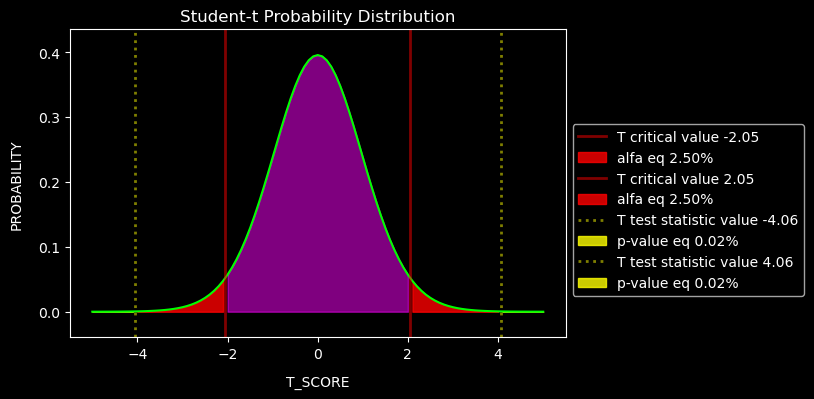

In [24]:
# plotting a compatible T Distribution in order to show where the T main statistics above are placed compared to the critical values, as well 
# as how much greater or smaller the two-tailed p-value area is when compared to the alfa area.

# creating x_axis and y_axis values lists
t_score_x_axis_list = np.arange(-5.00,5.1,0.1)
t_score_y_axis_list = list(map(lambda t:stats.t.pdf(t, df=furnace_t_test_degrees_of_freedom), t_score_x_axis_list))

# tabulating data into a pandas dataframe
t_score_dataframe = pd.DataFrame(columns=["T_SCORE", "PROBABILITY"])
t_score_dataframe["T_SCORE"] = t_score_x_axis_list
t_score_dataframe["PROBABILITY"] = t_score_y_axis_list
print(f"{t_score_dataframe.loc[0:t_score_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(t_score_x_axis_list, t_score_y_axis_list, color="lime")
ax.set_xlabel("T_SCORE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE>furnace_t_test_left_tail_critical_value)&(t_score_dataframe.T_SCORE<furnace_t_test_right_tail_critical_value), color="fuchsia", alpha=0.5)
ax.axvline(furnace_t_test_left_tail_critical_value, alpha=0.5, linestyle=('-'), label=f"T critical value {round(furnace_t_test_left_tail_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE<=furnace_t_test_left_tail_critical_value)&(t_score_dataframe.T_SCORE>furnace_t_test_left_tail_statistic), color="red", alpha=0.8, label=f"alfa eq {furnace_t_test_two_tailed_alfa/2*100:.2f}%")
ax.axvline(furnace_t_test_right_tail_critical_value, alpha=0.5, linestyle=('-'), label=f"T critical value {round(furnace_t_test_right_tail_critical_value,2)}", color="red", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=(t_score_dataframe.T_SCORE>=furnace_t_test_right_tail_critical_value)&(t_score_dataframe.T_SCORE<furnace_t_test_right_tail_statistic), color="red", alpha=0.8, label=f"alfa eq {furnace_t_test_two_tailed_alfa/2*100:.2f}%")
ax.axvline(furnace_t_test_left_tail_statistic, alpha=0.5, linestyle=(":"), label=f"T test statistic value {round(furnace_t_test_left_tail_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE<=furnace_t_test_left_tail_statistic, color="yellow", alpha=0.8, label=f"p-value eq {round(furnace_t_test_left_tail_p_value*100,2)}%")
ax.axvline(furnace_t_test_right_tail_statistic, alpha=0.5, linestyle=(":"), label=f"T test statistic value {round(furnace_t_test_right_tail_statistic,2)}", color="yellow", linewidth=2)
ax.fill_between(x=t_score_dataframe.T_SCORE, y1=t_score_dataframe.PROBABILITY, y2=0, where=t_score_dataframe.T_SCORE>=furnace_t_test_right_tail_statistic, color="yellow", alpha=0.8, label=f"p-value eq {round(furnace_t_test_right_tail_p_value*100,2)}%")
ax.set_title("Student-t Probability Distribution")
ax.set_ymargin(0.1)
fig.set_figheight(4)
ax.legend(bbox_to_anchor=(1, 0.715))
plt.show()